In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


<h3>DATA LOADING :

In [3]:

# Loading the dataframe

init_df = pd.read_csv(r"SchoolsData.csv")


In [4]:
# How our data looks like
print(init_df.head())

   school_id  emiscode     school_name       district           tehsil  \
0      40310  37220028  GES AHMED ABAD         JHELUM  PIND DADAN KHAN   
1      39291  37130083  GES AHMED ABAD         ATTOCK       PINDI GHEB   
2       6036  31330090  GES AHMED ABAD  RAHIMYAR KHAN    RAHIMYAR KHAN   
3      36287  36330251  GES AHMED ABAD         VEHARI           VEHARI   
4      32931  35610454     GES ALI PUR  NANKANA SAHIB    NANKANA SAHIB   

                  markaz             moza  \
0           LILLA - MALE        Ahmadabad   
1       MALHOWALI - MALE       Ahmad Abad   
2  DARI AZIM KHAN - MALE  Bukhshan Araeen   
3          SATLUJ - MALE       Ahmad Abad   
4       WARBURTON - MALE           Alipur   

                                   permanent_address      street_name  \
0  village post office ahmadabad tehsil pind dada...        Ahmadabad   
1  Dhoke Ahmed Abad Post Office Malhowali Tehsil ...        Malhowali   
2  Basti Ahmad Abad moza bukhshan araeen P/O kot ...       Ahmad 

In [5]:
# shape of our data 
print(init_df.shape)

(48191, 56)


In [6]:
# looking for null values 
print(init_df.isna().sum())

school_id                     0
emiscode                      0
school_name                   0
district                      0
tehsil                        0
markaz                        0
moza                       1503
permanent_address             1
street_name                  63
uc_name                       1
uc_no                         0
na_no                         0
pp_no                         0
head_name                   173
head_type                   199
head_grade                  173
school_status                 0
medium                        0
school_shift                  0
school_location               0
school_gender                 0
gender_studying               0
school_level                  0
school_type                1509
est_year                      0
upgrade_primary_year      11799
upgrade_middle_year       11798
upgrade_high_year         11798
upgrade_high_sec_year     11799
bldg_status                   0
school_ownership            277
place_st

<h3>DATA CLEANING :</h3>

There are alot of columns and not all are relevant to our project , so we will drop and select the ones that adds more value .

In [7]:
# dropped columns with high number of null values

init_df.drop(['drink_water_type_other','upgrade_primary_year','upgrade_middle_year','upgrade_high_year','upgrade_high_sec_year' ],axis=1,inplace=True)

In [8]:
# selecting the important features 
features = ['school_id','district','tehsil','est_year','school_gender','gender_studying','bldg_condition','classes','functional_classrooms','enrollment','Teachers','NonTeachers','electricity','drink_water','toilets','teachers_toilets']

In [9]:
# new dataframe 
df=init_df[features]
df.isna().sum()

school_id                    0
district                     0
tehsil                       0
est_year                     0
school_gender                0
gender_studying              0
bldg_condition             240
classes                      0
functional_classrooms        0
enrollment                   2
Teachers                   161
NonTeachers              24630
electricity                  0
drink_water                  0
toilets                      0
teachers_toilets            19
dtype: int64

In [10]:
df['bldg_condition'].fillna('Medium Condition',inplace=True)
df['teachers_toilets'].fillna(0,inplace=True)
df['enrollment'].fillna(np.mean(df['enrollment']),inplace=True)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\958572167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bldg_condition'].fillna('Medium Condition',inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\958572167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['teachers_toilets'].fillna(0,inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\958572167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [11]:
df.isna().sum()

school_id                    0
district                     0
tehsil                       0
est_year                     0
school_gender                0
gender_studying              0
bldg_condition               0
classes                      0
functional_classrooms        0
enrollment                   0
Teachers                   161
NonTeachers              24630
electricity                  0
drink_water                  0
toilets                      0
teachers_toilets             0
dtype: int64

In [12]:
df.sort_values(by='district', ascending=True,inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\1122125770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='district', ascending=True,inplace=True)


In [13]:
df['Teachers'].interpolate('nearest',inplace=True)
df['NonTeachers'].interpolate('nearest',inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\2631124012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teachers'].interpolate('nearest',inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\2631124012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NonTeachers'].interpolate('nearest',inplace=True)


In [14]:
df['Teachers'].fillna(np.mean(df['Teachers']),inplace=True)
df['NonTeachers'].fillna(0,inplace=True)

df.isna().sum()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\1108718389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teachers'].fillna(np.mean(df['Teachers']),inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\1108718389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NonTeachers'].fillna(0,inplace=True)


school_id                0
district                 0
tehsil                   0
est_year                 0
school_gender            0
gender_studying          0
bldg_condition           0
classes                  0
functional_classrooms    0
enrollment               0
Teachers                 0
NonTeachers              0
electricity              0
drink_water              0
toilets                  0
teachers_toilets         0
dtype: int64

FEATURE ENGINEERING : 

In [15]:
resources=['electricity','drink_water','toilets','teachers_toilets']

def count_missing_resources(row):
  # Count the number of zeros (missing resources) in the resource columns
  return sum(row[resources] == 0)

# Apply the function to each row and add a new 'lack_resource' column
df['lack_resource'] = df.apply(count_missing_resources, axis=1)




C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\45713208.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lack_resource'] = df.apply(count_missing_resources, axis=1)


In [16]:
df['lack_resource'].value_counts()

lack_resource
0    36159
1    11614
2      339
3       64
4       15
Name: count, dtype: int64

In [17]:
# determining functional classes ratio of each school 
df["fnl_class_ratio"]=df['functional_classrooms']/df['classes']


C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\4096120550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fnl_class_ratio"]=df['functional_classrooms']/df['classes']


In [18]:
df['bldg_condition'].value_counts()

bldg_condition
Satisfying                           36119
Needed Minor Repairing                7999
Partial Building is Dangerous         1891
Complete Building Needs Repairing     1485
Building Is Dangerous                  457
Medium Condition                       240
Name: count, dtype: int64

In [19]:
df['bldg_status_code']=df['bldg_condition'].replace(['Satisfying','Needed Minor Repairing','Medium Condition','Partial Building is Dangerous','Complete Building Needs Repairing','Building Is Dangerous'],[1,1.5,2,2.5,4,5])

C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\98366981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bldg_status_code']=df['bldg_condition'].replace(['Satisfying','Needed Minor Repairing','Medium Condition','Partial Building is Dangerous','Complete Building Needs Repairing','Building Is Dangerous'],[1,1.5,2,2.5,4,5])


In [20]:
df

,school_id,district,tehsil,est_year,school_gender,gender_studying,bldg_condition,classes,functional_classrooms,enrollment,Teachers,NonTeachers,electricity,drink_water,toilets,teachers_toilets,lack_resource,fnl_class_ratio,bldg_status_code
7737,39127,ATTOCK,FATEH JANG,1976,Female,Female,Satisfying,9,9,177.0,12.0,2.0,1,1,1,1.0,0,1.000000,1.0
4726,39575,ATTOCK,JAND,1926,Male,Both,Needed Minor Repairing,9,4,132.0,8.0,3.0,1,1,1,1.0,0,0.444444,1.5
9219,39129,ATTOCK,FATEH JANG,1976,Female,Both,Satisfying,9,4,115.0,10.0,2.0,1,1,1,0.0,1,0.444444,1.0
4707,38990,ATTOCK,FATEH JANG,1973,Male,Male,Satisfying,9,5,93.0,10.0,2.0,1,1,1,1.0,0,0.555556,1.0
20438,39419,ATTOCK,PINDI GHEB,1989,Female,Both,Satisfying,6,2,51.0,3.0,1.0,1,1,1,1.0,0,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39143,36486,VEHARI,VEHARI,1987,Male,Both,Satisfying,6,3,157.0,4.0,1.0,1,1,1,1.0,0,0.500000,1.0
39155,35205,VEHARI,BUREWALA,1961,Male,Male,Satisfying,6,4,271.0,5.0,1.0,1,1,1,1.0,0,0.666667,1.0
39156,35202,VEHARI,BUREWALA,1973,Male,Male,Satisfying,6,2,153.0,4.0,1.0,1,1,1,1.0,0,0.333333,1.0
35066,35302,VEHARI,BUREWALA,1973,Male,Male,Satisfying,6,3,242.0,6.0,1.0,1,1,1,1.0,0,0.500000,1.0


In [21]:
df['fnl_class_ratio'].replace(np.inf,0.0,inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\3490764543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fnl_class_ratio'].replace(np.inf,0.0,inplace=True)


In [22]:
df['fnl_class_ratio'].fillna(0,inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\1018235614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fnl_class_ratio'].fillna(0,inplace=True)


In [23]:
df['fnl_class_ratio'].max(),df['fnl_class_ratio'].min()

(10.2, 0.0)

<h3>EXPLORATORY DATA ANALYSIS :

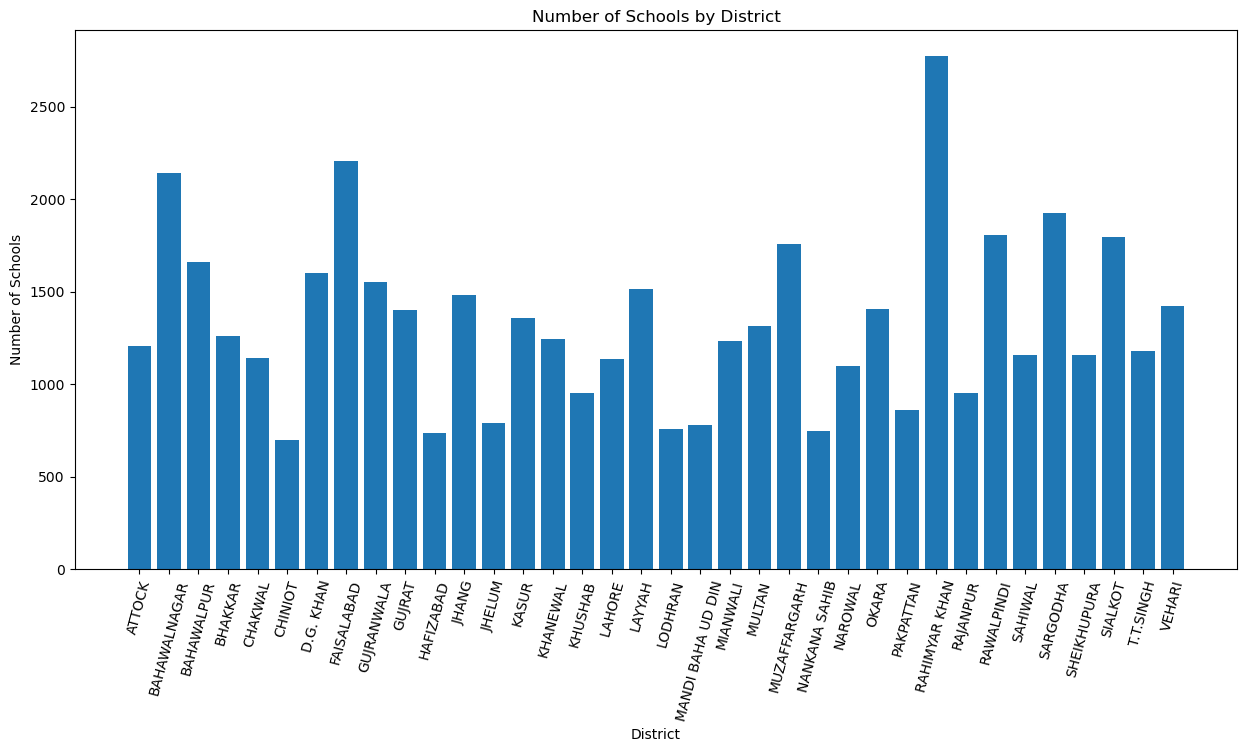

In [24]:
district_counts = df.groupby('district')['school_id'].count()
plt.figure(figsize=(15,7))
# Extract district names and counts for plotting
districts = district_counts.index.to_numpy()  # Get district names as NumPy array
counts = district_counts.to_numpy()  # Get counts as NumPy array

# Create the bar chart
plt.bar(districts, counts)

# Add labels and title
plt.xlabel('District')
plt.ylabel('Number of Schools')
plt.xticks(rotation=75)
plt.title('Number of Schools by District')

# Display the plot
plt.show()

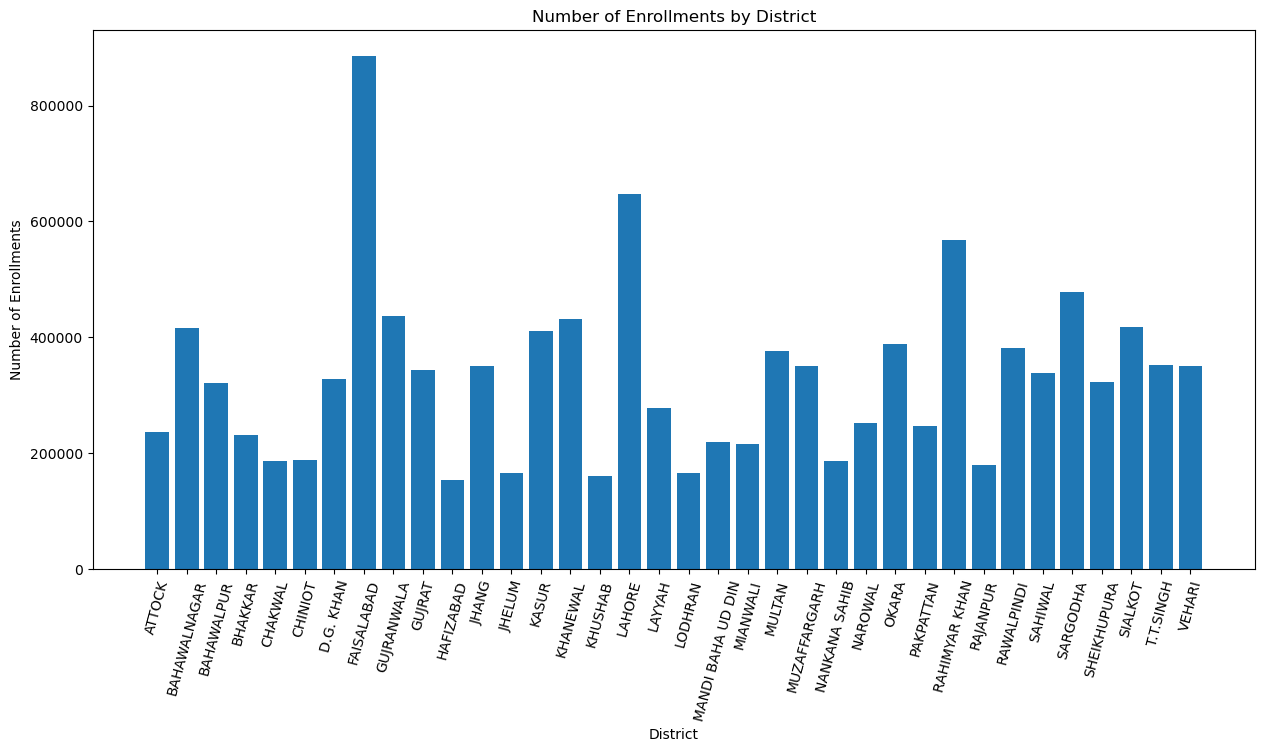

In [25]:
district_counts = df.groupby('district')['enrollment'].sum()
plt.figure(figsize=(15,7))
# Extract district names and counts for plotting
districts = district_counts.index.to_numpy()  # Get district names as NumPy array
counts = district_counts.to_numpy()  # Get counts as NumPy array

# Create the bar chart
plt.bar(districts, counts)

# Add labels and title
plt.xlabel('District')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=75)
plt.title('Number of Enrollments by District')

# Display the plotBlockingIOError
plt.show()

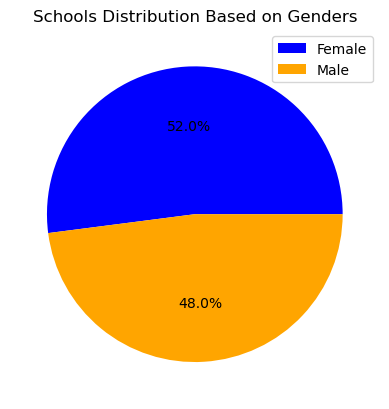

In [26]:
plt.pie(df.groupby("school_gender")["enrollment"].sum(),autopct='%1.1f%%',colors=["blue","orange"])
plt.title('Schools Distribution Based on Genders')
plt.legend(labels=['Female','Male'])
plt.show()


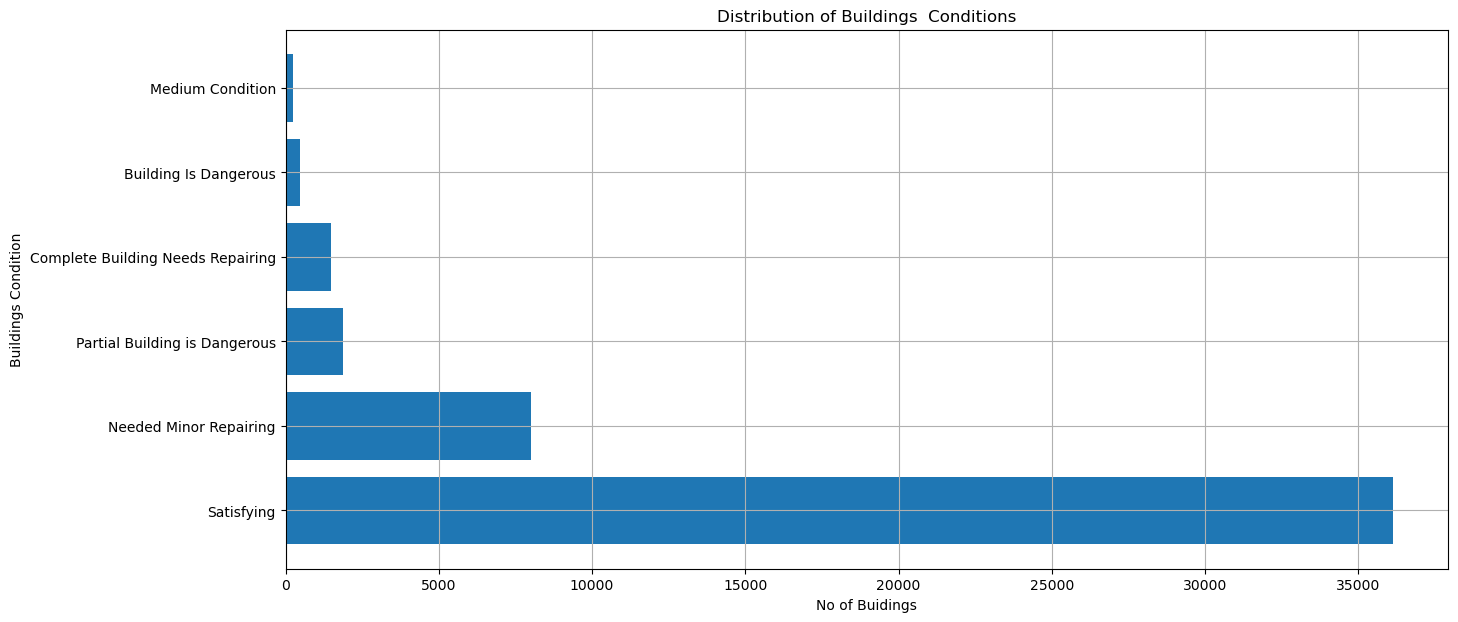

In [27]:
bldg_cond = df["bldg_condition"].value_counts()
condition=bldg_cond.index.to_numpy()
plt.figure(figsize=(15,7))

counts = bldg_cond.to_numpy()  # Get counts as NumPy array

# # Create the bar chart
plt.barh(condition, counts)
# Add labels and title
plt.xlabel('No of Buidings')
plt.ylabel('Buildings Condition')
plt.title('Distribution of Buildings  Conditions')
plt.grid()

# Display the plotBlockingIOError
plt.show()

<Axes: >

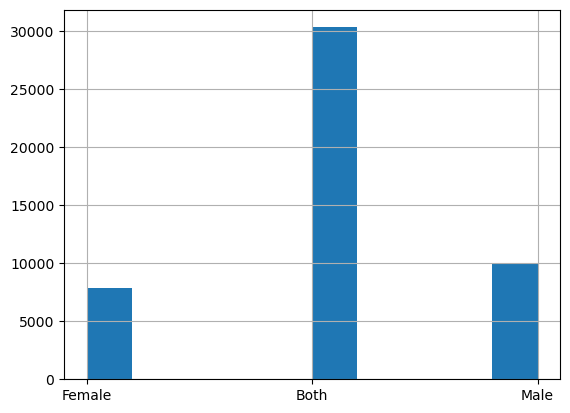

In [28]:
# gender studying in school 
df['gender_studying'].hist()

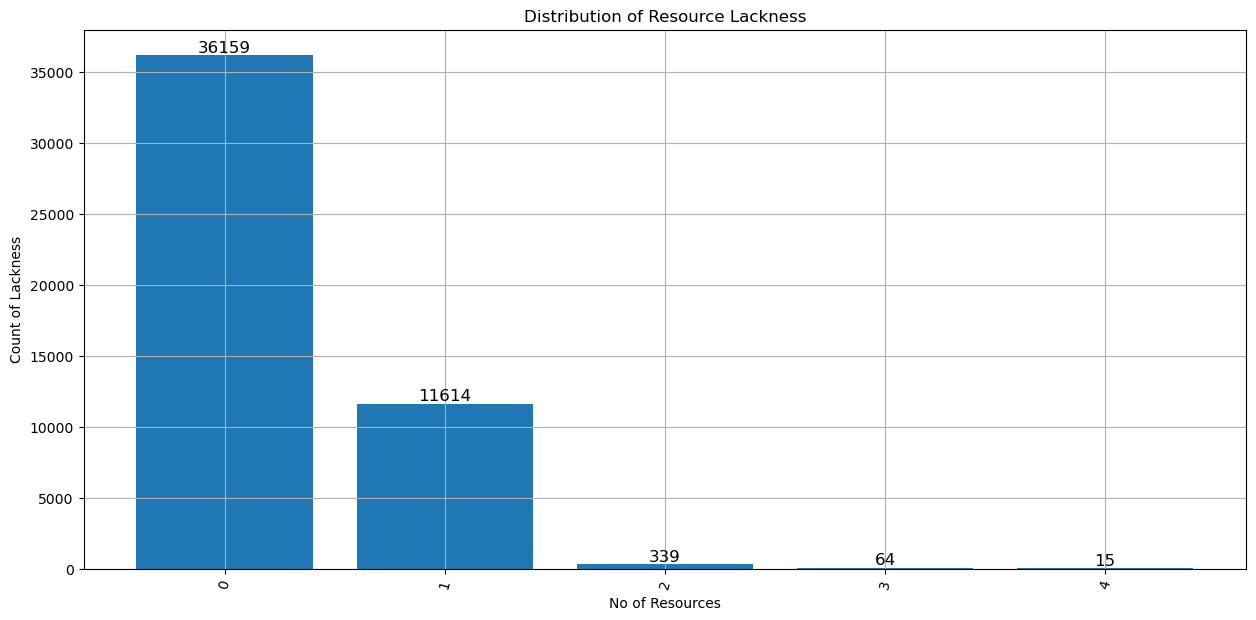

In [29]:
bldg_cond = df["lack_resource"].value_counts()
condition=bldg_cond.index.to_numpy()
plt.figure(figsize=(15,7))

counts = bldg_cond.to_numpy()  # Get counts as NumPy array

# # Create the bar chart
plt.bar(condition, counts)
for i, v in enumerate(counts):  # Loop through bars and counts
  plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12)
# Add labels and title
plt.xlabel('No of Resources')
plt.ylabel('Count of Lackness')
plt.xticks(rotation=75)
plt.title('Distribution of Resource Lackness')
plt.grid()

# Display the plotBlockingIOError
plt.show()

<h3>FUND ALLOCATION :

In [30]:
# Funds for combined gender schools 
def both_gender_fund(row):
    if row['gender_studying']=='Both':
        return 6098
    else :
        return 0
        
# funds for building condition       
def calculate_bldg_fund(row):
    if row['bldg_status_code'] == 1.0:
        return 8500
    elif row['bldg_status_code'] == 1.5:
        return 15000     
    elif row['bldg_status_code'] == 2.0:
        return 25000
    elif row['bldg_status_code'] == 2.5:
        return 50237.9
    elif row['bldg_status_code'] == 4.0:
        return 75420
    elif row['bldg_status_code'] == 5.0:
        return 150000
     
# function to allocate resource fund 
def resources_fund(row):
    if row['lack_resource']==0:
        return 0
    elif row['lack_resource']==1:
        return 11957
    elif row['lack_resource']==2:
        return 2*11957
    elif row['lack_resource']==3:
        return 3*11957    
    elif row['lack_resource']==4:
        return 4*11957    


def classes_fund(row):
    if (row['fnl_class_ratio']<=10.2) & (row['fnl_class_ratio']>=0.75):
        return 3069.9
    elif (row['fnl_class_ratio']<0.75) & (row['fnl_class_ratio']>=0.50):
        return 2*3069.9
    elif (row['fnl_class_ratio']<0.50) & (row['fnl_class_ratio']>=0.25):
        return 3*3069.9
    elif (row['fnl_class_ratio']<0.25) & (row['fnl_class_ratio']>=0.0):
        return 4*3069.9    

# funds for old buildings 
def old_bldg_fund(row):
    if row['building_age']>=50:
        return 4274
    elif row['building_age']<50:
        return 0

In [31]:


# formula = (new.apply(old_bldg_fund, axis=1))+20750 + (new['enrollment']*16.7) + (new['Teachers']*204.1)+(new['NonTeachers']*196)+(new.apply(calculate_bldg_fund, axis=1))+(new.apply(both_gender_fund, axis=1))+(new.apply(resources_fund, axis=1))+(new.apply(classes_fund, axis=1))
# formula
# MAIN FUNCTION FOR FORMULA 



In [32]:
df['building_age']=2024-df['est_year']


C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\598215428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['building_age']=2024-df['est_year']


In [33]:
formula =  (df.apply(old_bldg_fund, axis=1)) +20750 + (df['enrollment']*16.7) + (df['Teachers']*204.1)+(df['NonTeachers']*196)+(df.apply(calculate_bldg_fund, axis=1))+(df.apply(both_gender_fund, axis=1))+(df.apply(resources_fund, axis=1))+(df.apply(classes_fund, axis=1))
     


In [34]:
df['bldg_status_code'].value_counts() 

bldg_status_code
1.0    36119
1.5     7999
2.5     1891
4.0     1485
5.0      457
2.0      240
Name: count, dtype: int64

In [35]:
# df['funds']=df.apply(funds_formula,axis=1)
df['funds']=formula
df

C:\Users\PMLS\AppData\Local\Temp\ipykernel_12056\203888624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['funds']=formula


,school_id,district,tehsil,est_year,school_gender,gender_studying,bldg_condition,classes,functional_classrooms,enrollment,...,NonTeachers,electricity,drink_water,toilets,teachers_toilets,lack_resource,fnl_class_ratio,bldg_status_code,building_age,funds
7737,39127,ATTOCK,FATEH JANG,1976,Female,Female,Satisfying,9,9,177.0,...,2.0,1,1,1,1.0,0,1.000000,1.0,48,38117.0
4726,39575,ATTOCK,JAND,1926,Male,Both,Needed Minor Repairing,9,4,132.0,...,3.0,1,1,1,1.0,0,0.444444,1.5,98,59756.9
9219,39129,ATTOCK,FATEH JANG,1976,Female,Both,Satisfying,9,4,115.0,...,2.0,1,1,1,0.0,1,0.444444,1.0,48,60868.2
4707,38990,ATTOCK,FATEH JANG,1973,Male,Male,Satisfying,9,5,93.0,...,2.0,1,1,1,1.0,0,0.555556,1.0,51,43649.9
20438,39419,ATTOCK,PINDI GHEB,1989,Female,Both,Satisfying,6,2,51.0,...,1.0,1,1,1,1.0,0,0.333333,1.0,35,46217.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39143,36486,VEHARI,VEHARI,1987,Male,Both,Satisfying,6,3,157.0,...,1.0,1,1,1,1.0,0,0.500000,1.0,37,45122.1
39155,35205,VEHARI,BUREWALA,1961,Male,Male,Satisfying,6,4,271.0,...,1.0,1,1,1,1.0,0,0.666667,1.0,63,45406.0
39156,35202,VEHARI,BUREWALA,1973,Male,Male,Satisfying,6,2,153.0,...,1.0,1,1,1,1.0,0,0.333333,1.0,51,46301.2
35066,35302,VEHARI,BUREWALA,1973,Male,Male,Satisfying,6,3,242.0,...,1.0,1,1,1,1.0,0,0.500000,1.0,51,45125.8


In [36]:
df.to_csv(r'C:\Users\PMLS\Desktop\Python\Funds Distribution\CleanedData.csv')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\PMLS\\Desktop\\Python\\Funds Distribution\\CleanedData.csv'

In [37]:
df['funds'].sum()

2750203885.0279784